In [1]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Read the file
file_path="C:\\Users\\pc\\Documents\\Visadataset.csv"
visa_df=pd.read_csv(file_path)
visa_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


$ Box plot$

<img src="https://pieriantraining.com/wp-content/uploads/sites/2/2022/07/Untitled-2.jpg" jsaction="" class="sFlh5c FyHeAf iPVvYb" style="max-width: 1122px; height: 174px; margin: 0px; width: 351px;" alt="How to interpret box plots - Pierian Training" jsname="kn3ccd" aria-hidden="false">

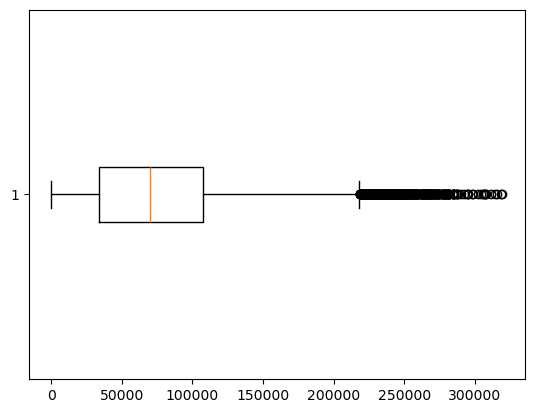

In [21]:
plt.boxplot(visa_df['prevailing_wage'],vert=False)
plt.show()

# Black dots on the box plots are outliers

In [13]:
Q1=np.percentile(visa_df['prevailing_wage'],25)
Q2=np.percentile(visa_df['prevailing_wage'],50)
Q3=np.percentile(visa_df['prevailing_wage'],75)
Minimum=visa_df['prevailing_wage'].min()
Maximum=visa_df['prevailing_wage'].max()
IQR=Q3-Q1




### Dealing outliers
- Removal of outliers
- Impute the outliers with median value because median is not impacted by outliers
- Cap the outliers with Q3, which are having more than Q3
- Cap the outliers with Q1, which are having less than Q1

In [44]:
# Find the outliers

Q1=np.percentile(visa_df['prevailing_wage'],25)
Q2=np.percentile(visa_df['prevailing_wage'],50)
Q3=np.percentile(visa_df['prevailing_wage'],75)
Minimum=visa_df['prevailing_wage'].min()
Maximum=visa_df['prevailing_wage'].max()
IQR=Q3-Q1
UB=Q3+1.5*IQR
LB=Q1-1.5*IQR
con1=visa_df['prevailing_wage']>UB
con2=visa_df['prevailing_wage']<LB
con1|con2
outliers=visa_df['prevailing_wage'][con1|con2]
# series into array of values
outliers_data=outliers.values
len(outliers_data)

427

In [46]:
def outliers():
    Q1=np.percentile(visa_df['prevailing_wage'],25)
    Q2=np.percentile(visa_df['prevailing_wage'],50)
    Q3=np.percentile(visa_df['prevailing_wage'],75)
    Minimum=visa_df['prevailing_wage'].min()
    Maximum=visa_df['prevailing_wage'].max()
    IQR=Q3-Q1
    UB=Q3+1.5*IQR
    LB=Q1-1.5*IQR
    con1=visa_df['prevailing_wage']>UB
    con2=visa_df['prevailing_wage']<LB
    con1|con2
    #####################################################################################
    outliers=visa_df['prevailing_wage'][con1|con2]   # only specific columns
    ####################################################################################
    outliers_data=outliers.values
    return(outliers_data)

outliers_data=outliers()
len(outliers_data)

427

In [56]:
Q1=np.percentile(visa_df['prevailing_wage'],25)
Q2=np.percentile(visa_df['prevailing_wage'],50)
Q3=np.percentile(visa_df['prevailing_wage'],75)
Minimum=visa_df['prevailing_wage'].min()
Maximum=visa_df['prevailing_wage'].max()
IQR=Q3-Q1
UB=Q3+1.5*IQR
LB=Q1-1.5*IQR
con1=visa_df['prevailing_wage']>UB
con2=visa_df['prevailing_wage']<LB
con1|con2
#####################################################################################
outliers=visa_df[con1|con2]# only specific columns
outliers
####################################################################################

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
14,EZYV15,Asia,Master's,Y,Y,15756,2006,South,220081.73,Year,Y,Certified
34,EZYV35,Asia,Master's,N,N,1809,2010,South,225569.73,Year,N,Certified
130,EZYV131,South America,High School,N,N,2554,2005,Midwest,247393.01,Year,Y,Certified
216,EZYV217,Asia,Master's,Y,N,1515,2001,Midwest,269321.68,Year,N,Certified
221,EZYV222,North America,Doctorate,Y,Y,2518,2010,South,219529.62,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25191,EZYV25192,Asia,Master's,N,N,4983,2005,Midwest,280482.51,Year,Y,Denied
25195,EZYV25196,North America,Master's,Y,N,47,2001,South,234308.77,Year,N,Certified
25468,EZYV25469,Asia,Bachelor's,N,N,373,2005,Midwest,272715.74,Year,N,Certified
25469,EZYV25470,North America,Master's,Y,N,2261,1997,Northeast,273772.47,Year,N,Certified


In [60]:
len(outliers_data),len(visa_df),len(outliers_data)*100/len(visa_df)

(427, 25480, 1.6758241758241759)

#### case-1:

- Removal of outliers

- we have 427 outliers in pre_wage column

- that means we need to remove 427 rows from entire data frame

In [7]:
Q1=np.percentile(visa_df['prevailing_wage'],25)
Q2=np.percentile(visa_df['prevailing_wage'],50)
Q3=np.percentile(visa_df['prevailing_wage'],75)
Minimum=visa_df['prevailing_wage'].min()
Maximum=visa_df['prevailing_wage'].max()
IQR=Q3-Q1
UB=Q3+1.5*IQR
LB=Q1-1.5*IQR
con1=visa_df['prevailing_wage']<UB
con2=visa_df['prevailing_wage']>LB
con1&con2
#####################################################################################
non_outliers=visa_df['prevailing_wage'][con1&con2]# only specific columns
non_outliers
####################################################################################

0           592.2029
1         83425.6500
2        122996.8600
3         83434.0300
4        149907.3900
            ...     
25474     51104.7800
25475     77092.5700
25477    146298.8500
25478     86154.7700
25479     70876.9100
Name: prevailing_wage, Length: 25053, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x2922c7ca1e0>,
 'caps': [<matplotlib.lines.Line2D at 0x2922c7ca7b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2922c7c9f10>],
 'medians': [<matplotlib.lines.Line2D at 0x2922c7cad80>],
 'fliers': [<matplotlib.lines.Line2D at 0x2922c7cb020>],
 'means': []}

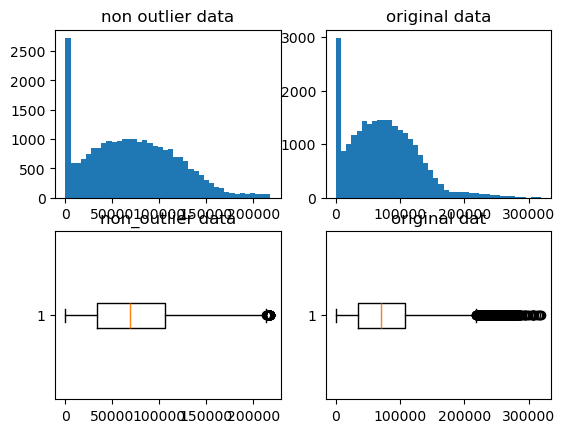

In [9]:
plt.subplot(2,2,1)
plt.title('non outlier data')
plt.hist(non_outliers,
         bins=40)

plt.subplot(2,2,2)
plt.title('original data')
plt.hist(visa_df['prevailing_wage'],
         bins=40)

plt.subplot(2,2,3)
plt.title('non_outlier data')
plt.boxplot(visa_df['prevailing_wage'][con1&con2],
           vert=False)

plt.subplot(2,2,4)
plt.title('original dat')
plt.boxplot(visa_df['prevailing_wage'],
           vert=False)


### case-2:

- Impute with median

- we got pre_wage as 427 outliers

- we replace those 427 with median value of pre_wage

In [12]:
# iterate through pre_wage as i
# if any value>ub or <lb ======> median
# else: i

In [14]:
Med=np.median(visa_df['prevailing_wage'].values)
Med

70308.20999999999

In [20]:
new_values=[]
for i in visa_df['prevailing_wage'].values:
    if i>UB or i<LB:
        new_values.append(Med)
    else:
        new_values.append(i)

len(new_values)
        
     # we are iterate through pre_wage data
   # If any data point >ub or<lb then it is a outliers so in that position we are keeping median value of the column
# otherwise we are keeping the same value

25480

In [147]:
pd.DataFrame(new_values,columns=['prevailing_wage'])

,prevailing_wage
0,592.2029
1,83425.6500
2,122996.8600
3,83434.0300
4,149907.3900
...,...
25475,77092.5700
25476,70308.2100
25477,146298.8500
25478,86154.7700


In [125]:
data=pd.Series(new_values)
data

0           592.2029
1         83425.6500
2        122996.8600
3         83434.0300
4        149907.3900
            ...     
25475     77092.5700
25476    279174.7900
25477    146298.8500
25478     86154.7700
25479     70876.9100
Length: 25480, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x28a36e89670>,
 'caps': [<matplotlib.lines.Line2D at 0x28a36e89be0>,
 'boxes': [<matplotlib.lines.Line2D at 0x28a36e89400>],
 'medians': [<matplotlib.lines.Line2D at 0x28a36e8a120>],
 'fliers': [<matplotlib.lines.Line2D at 0x28a36e8a3f0>],
 'means': []}

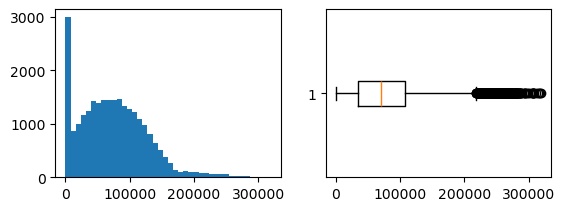

In [149]:
plt.subplot(2,2,1)
plt.hist(data,
         bins=40)
plt.subplot(2,2,2)
plt.boxplot(data,
           vert=False)

## np.where

In [29]:
dict1={'col1':[1,2,3,4],
'col2':['A','B','C','D']}
data=pd.DataFrame(dict1)
data

,col1,col2
0,1,A
1,2,B
2,3,C
3,4,D


In [ ]:
# I want to impute with a value 100 in the col1
# which are having values >2
# np.where() will take 3 argument values
# condn: data['col1']>2
# if that condn is true will provide the value:100
# if that condn is false will keep the same value : data['col1']
# np.where(<condn>,<True>,<False>)

In [38]:
import numpy as np
data_=np.where(data['col1']>2,100,data['col1'])
data_
# works for binary condn only

array([  1,   2, 100, 100], dtype=int64)

In [83]:
data

,col1,col2
0,1,A
1,2,B
2,100,C
3,100,D


## case-1

In [45]:
# create a new column
data['new_column']=[100,200,300,400]
data

,col1,col2,new_column
0,1,A,100
1,2,B,200
2,3,C,300
3,4,D,400


## case-2: overwrite the column values

In [56]:
data['col1']=np.where(data['col1']>2,100,data['col1'])
data

,col1,col2,new_column,col3
0,1,A,100,1
1,2,B,200,2
2,100,C,300,100
3,100,D,400,100


## Drop unwanted columns

In [62]:
data.drop(['new_column','col3'],
          axis=1,
          inplace=True)

In [64]:
data

,col1,col2
0,1,A
1,2,B
2,100,C
3,100,D


In [68]:
# Implement the above task with prevailing wage

In [85]:
con1=visa_df['prevailing_wage']>UB
con2=visa_df['prevailing_wage']<LB
con=con1|con2
con

0        False
1        False
2        False
3        False
4        False
         ...  
25475    False
25476     True
25477    False
25478    False
25479    False
Name: prevailing_wage, Length: 25480, dtype: bool

In [89]:
Nikesh=np.where(con,Med,visa_df['prevailing_wage'])
Nikesh

array([   592.2029,  83425.65  , 122996.86  , ..., 146298.85  ,
        86154.77  ,  70876.91  ])

In [95]:
Wagle=pd.Series(Nikesh)
Wagle

0           592.2029
1         83425.6500
2        122996.8600
3         83434.0300
4        149907.3900
            ...     
25475     77092.5700
25476     70308.2100
25477    146298.8500
25478     86154.7700
25479     70876.9100
Length: 25480, dtype: float64

Text(0.5, 1.0, 'outlier')

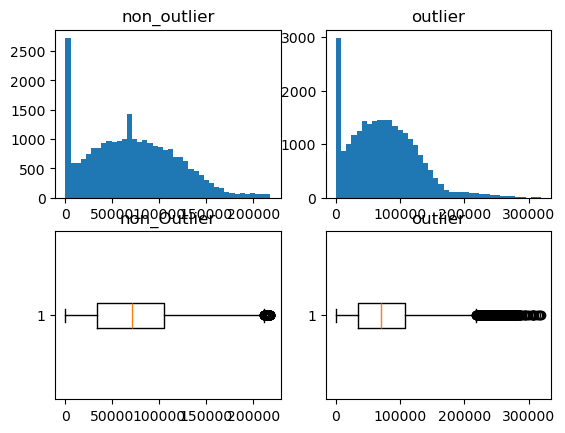

In [101]:
plt.subplot(2,2,1)
plt.title('non_outlier')
plt.hist(Wagle,
        bins=40)

plt.subplot(2,2,2)
plt.hist(visa_df['prevailing_wage'],
        bins=40)
plt.title('outlier')

plt.subplot(2,2,3)
plt.boxplot(Wagle,
           vert=False)
plt.title('non_Outlier')

plt.subplot(2,2,4)
plt.boxplot(visa_df['prevailing_wage'],
           vert=False)
plt.title('outlier')
